In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
#data
df=pd.read_csv('with_best_eleven.csv')

In [16]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,id,y,year,stage,match,gameday,...,holiday,weekday,NHKs,capa,abs_score_dif,pop_home,pop_away,not_pop_home,not_pop_away,best_eleven
0,0,0,0,0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),...,0,0,1,19694,1,4.0,16.0,0.0,0.0,2
1,1,1,1,1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),...,0,0,0,40000,1,16.0,14.0,0.0,1.0,0
2,2,2,2,2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),...,0,0,0,21000,1,2.0,4.0,0.0,1.0,2
3,3,3,3,3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),...,0,0,0,50000,1,11.0,27.0,0.0,0.0,4
4,4,4,4,4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),...,0,0,0,39232,0,5.0,11.0,0.0,0.0,0
5,5,5,5,5,13999,11283,2012,Ｊ１,第１節第１日,03/10(土),...,0,0,0,24490,0,5.0,16.0,0.0,0.0,2
6,6,6,6,6,14000,18920,2012,Ｊ１,第１節第１日,03/10(土),...,0,0,0,26530,1,14.0,9.0,0.0,0.0,0
7,7,7,7,7,14001,11437,2012,Ｊ１,第１節第１日,03/10(土),...,0,0,0,15600,1,0.0,11.0,0.0,0.0,1
8,8,8,8,8,14002,13082,2012,Ｊ１,第１節第２日,03/11(日),...,0,0,0,15349,0,4.0,14.0,0.0,0.0,3
9,9,9,9,9,14004,41069,2012,Ｊ１,第２節第１日,03/17(土),...,0,0,1,63700,1,42.0,13.0,1.0,0.0,2


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'distance', 'section_num', 'J1_section_num',
       'J2_section_num', 'J1_section_val', 'J2_section_val', 'rain', 'cloudy',
       'indoor', 'sunny', 'fri', 'sat', 'sun', 'holiday', 'weekday', 'NHKs',
       'capa', 'abs_score_dif', 'pop_home', 'pop_away', 'not_pop_home',
       'not_pop_away', 'best_eleven'],
      dtype='object')

In [19]:
#変数の作成
#sectionについて
df['section_val']=df['J1_section_val'].values+df['J2_section_val'].values
#pop_awayとnot_pop_awayなどの相関が嫌なのでまとめる
df['away_popularity']=df['pop_away'].values-df['not_pop_away'].values
df['home_popularity']=df['pop_home'].values-df['not_pop_home'].values

In [20]:
#説明変数の選択
df_pu=df.loc[:,['y','distance','capa','abs_score_dif','best_eleven','rain','cloudy','indoor','sunny','fri','sat','sun','holiday','NHKs','section_val','away_popularity','home_popularity']]

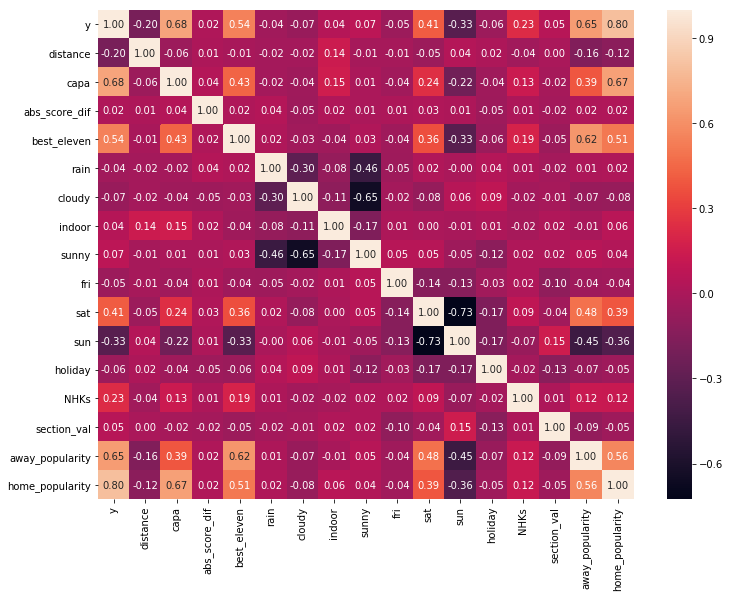

In [23]:
#ヒートマップの表示
plt.figure(figsize=(12,9))
sns.heatmap(df_pu.corr(),annot=True,fmt='.2f')
plt.show()

In [27]:
#データ分割
X=df_pu.drop('y',axis=1)
y=df_pu['y'].values
from sklearn.model_selection import train_test_split
(X_train, X_test,y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0,)

In [ ]:
#学習

In [166]:
listi=[]

In [174]:
#何の変数をdf_puから落とすかしていすれば予測を返す関数を定義
def predic(ls,model):
    #インスタンスの作成
    mod=model()
    #データを作る
    if ls==0:
        temp_train=X_train
        temp_test=X_test
    else:
        temp_train=X_train.drop(ls,axis=1)
        temp_test=X_test.drop(ls,axis=1)
    #回帰
    mod.fit(temp_train,y_train)
    #trainとtestについて予測値をリストで与える関数(predicting(model)[0]:trainの予測,predicting(model)[1]:testの予測)
    y_train_pred=[]
    y_test_pred=[]
    for i in range(len(X_train)):
        y_train_pred.append(min(mod.predict(temp_train)[i],X_train['capa'].values[i]))
    for i in range(len(X_test)):
        y_test_pred.append(min(mod.predict(temp_test)[i],X_test['capa'].values[i]))
    return y_train_pred,y_test_pred    

In [175]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [180]:
#何の変数をdf_puから落とすか指定すればRMSEを返す関数を定義
def rmse(ls,model):
    #インスタンスの作成
    mod=model()
    #データを作る
    if ls==0:
        temp_train=X_train
        temp_test=X_test
    else:
        temp_train=X_train.drop(ls,axis=1)
        temp_test=X_test.drop(ls,axis=1)
    #回帰
    mod.fit(temp_train,y_train)
    #trainとtestについて予測値をリストで与える関数(predicting(model)[0]:trainの予測,predicting(model)[1]:testの予測)
    y_train_pred=[]
    y_test_pred=[]
    for i in range(len(X_train)):
        y_train_pred.append(min(mod.predict(temp_train)[i],X_train['capa'].values[i]))
    for i in range(len(X_test)):
        y_test_pred.append(min(mod.predict(temp_test)[i],X_test['capa'].values[i]))
    #RMSE
    print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train, y_train_pred)),sqrt(mean_squared_error(y_test, y_test_pred))))

In [ ]:
#まずは相関しているとか考えずにすべての特徴量を使って予測。

In [28]:
#線形回帰
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7811874946329567
0.7394792260901811


In [188]:
predic(0,LinearRegression)[0]

[3560,
 14361.164607337185,
 5663.148428297154,
 13850.152065176077,
 11630.479272995899,
 29685.482064684336,
 37897.1054288644,
 4248.44804463119,
 11960.625423448015,
 8633.72931483091,
 7267.984683163796,
 15352.487704502899,
 2701.840453036474,
 37238.587388125205,
 7641.644695814818,
 7548.749932961923,
 14177.953631047509,
 6428.064770146915,
 5468.883033286318,
 16207.871089484763,
 8351.309317310766,
 20003.536196056,
 28583.54313547944,
 12332.889996625001,
 14901.757962147058,
 5068.388686545863,
 1504.1353141824059,
 7391.475829705131,
 11722.210020937413,
 -475.5090491744477,
 22158.547005796718,
 -4847.78562020325,
 2846.325588130456,
 9768.275578012937,
 4063.295916913368,
 7808.190571315432,
 18774.26391532107,
 16886.58549308902,
 9436.214431554186,
 26228.97596184019,
 9082.930367262885,
 8287.828628501544,
 8168.299781238897,
 3733.178448576508,
 29235.873562553305,
 3806.979107144249,
 2257.6002163709672,
 13860.7740798105,
 7248.504951004385,
 11874.039274401806,
 

In [181]:
rmse(0,LinearRegression)

RMSE Train: 3800.036, Test: 3990.061


In [249]:
rmse(['sunny','abs_score_dif'],LinearRegression)

RMSE Train: 3804.150, Test: 3983.917


In [123]:
#RMSEを出す関数
from sklearn.metrics import mean_squared_error
from math import sqrt
def RMSE(model):
    print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train, predicting(model)[0])),sqrt(mean_squared_error(y_test, predicting(model)[1]))))

In [116]:
print(predicting(lr)[0][3])
print(predicting(lr)[1][3])
print(X_train['capa'].values[3])

13850.152065176077
15850.953701973609
15600


In [121]:
RMSE(lr)

RMSE Train: 3800.036, Test: 3990.061


In [39]:
df_pu.describe()

,y,distance,capa,abs_score_dif,best_eleven,rain,cloudy,indoor,sunny,fri,sat,sun,holiday,NHKs,section_val,away_popularity,home_popularity
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000
mean,10629.558116,4.474267,25688.549411,1.238095,0.650282,0.176651,0.298515,0.028162,0.496672,0.024578,0.421915,0.418843,0.038914,0.008705,6.222227,-0.800307,-0.345110
std,8102.315189,3.182456,14016.934408,1.108898,1.133086,0.381471,0.457724,0.165477,0.500117,0.154873,0.493992,0.493496,0.193441,0.092915,0.885077,11.785005,16.083564
min,0.000000,0.081237,3560.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.659000,-16.000000,-37.000000
25%,4687.000000,1.833859,15589.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.749000,-11.000000,-12.000000
50%,8594.000000,3.827268,20246.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.270000,-5.000000,0.000000
75%,13471.000000,6.990566,30132.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.658000,11.000000,5.000000
max,62632.000000,15.301471,72327.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.419000,27.000000,41.000000


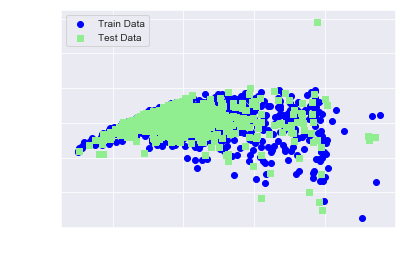

In [83]:
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
#plt.xlim([10, 50])

plt.show()

In [124]:
#XGBoost
import xgboost as xgb
mod = xgb.XGBRegressor()
mod.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [125]:
mod.score(X_train,y_train)

0.908577463652527

In [126]:
mod.score(X_test,y_test)

0.8269011450163848

In [183]:
predic(0,xgb.XGBRegressor)

([3468.8345,
  11343.478,
  6845.441,
  12078.255,
  11408.173,
  31018.006,
  39038.137,
  4909.4023,
  9671.166,
  4481.471,
  7343.4033,
  15725.682,
  3596.6963,
  49611.457,
  5869.854,
  9453.6045,
  15040.04,
  7205.324,
  7190.229,
  13651.085,
  5173.8374,
  19845.26,
  24381.828,
  13382.972,
  15502.644,
  3270.701,
  4278.445,
  7719.4463,
  8835.845,
  2327.8584,
  22953.453,
  2760.674,
  3267.8704,
  8465.301,
  4028.5112,
  5232.33,
  18019.896,
  15171.869,
  9415.131,
  34989.758,
  10131.761,
  7741.9307,
  7134.219,
  4102.576,
  24430.69,
  3683.739,
  3420.8794,
  12447.827,
  8644.256,
  13159.959,
  13647.0625,
  14554.804,
  8045.775,
  6077.7095,
  3459.977,
  5605.6445,
  22939.264,
  9521.0205,
  9874.6,
  3766.4817,
  2667.413,
  5024.7236,
  9915.378,
  2872.6658,
  3681.9446,
  5234.279,
  4789.0244,
  9988.958,
  4682.8926,
  10864.548,
  17789.902,
  7588.557,
  11479.286,
  27248.502,
  8665.626,
  15813.799,
  5999.744,
  4337.5415,
  5611.281,
  5768

In [184]:
rmse(0,xgb.XGBRegressor)

RMSE Train: 2480.130, Test: 3262.414


In [251]:
rmse(['sunny','abs_score_dif'],xgb.XGBRegressor)

RMSE Train: 2469.121, Test: 3201.439


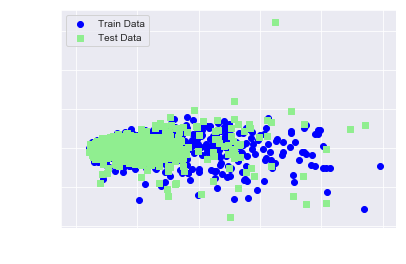

In [108]:
# 学習用、検証用それぞれで残差をプロット

plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')

# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
#plt.xlim([10, 50])


plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
#これは固定で。
X=df_pu.drop('y',axis=1)
y=df_drop['y'].values
(X_train, X_test,y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#線形

In [192]:
#予測の平均とる
train_predic_array=np.array([predic(['best_eleven','capa'],LinearRegression)[0],predic(['away_popularity','home_popularity'],LinearRegression)[0],predic(['best_eleven','home_popularity'],LinearRegression)[0],predic(['away_popularity','capa'],LinearRegression)[0]])
average_predic=np.mean(train_predic_array,axis=0)

In [193]:
average_predic

array([ 3396.73976956, 13353.32429098,  5160.78082495, ...,
        1929.3521469 ,  4298.19146989, 20164.03344823])

In [195]:
test_predic_array=np.array([predic(['best_eleven','capa'],LinearRegression)[1],predic(['away_popularity','home_popularity'],LinearRegression)[1],predic(['best_eleven','home_popularity'],LinearRegression)[1],predic(['away_popularity','capa'],LinearRegression)[1]])
average_predic_test=np.mean(test_predic_array,axis=0)

In [196]:
average_predic_test

array([20652.00343616,  5995.77971303,  4162.68345342, 15400.91075355,
        8185.81524512, 11673.23696298,  6026.68272926,  3230.24543236,
       12562.50199835,  1066.47671532,  7789.20478355,  4711.94426796,
       23188.28916691, 20696.019605  ,  2634.59837176,  1412.37633895,
       12900.97881146,  4604.42051607,  7621.65335754,  7850.04091924,
       14163.12749824, 20352.56622292,  6470.17397596,  4917.00605543,
       10873.13739179, 11538.81715651,  5201.90336332, 15999.34432894,
       16267.34666769, 12157.77087532,  6314.45122345, 14712.82410938,
       13836.38140197,  8133.07738093, 13948.22028445,  7209.29228575,
       14033.19147944, 28198.27468547, 12622.96350167, 16371.27161989,
       11362.58442282, 13973.60064524,  4970.79451637, 15297.87556062,
        5602.63321602,  9213.92042884,  9248.25915856,  3377.07191437,
       15881.2267725 ,  4465.48172172,  7773.27313341, 12645.6277357 ,
       21407.30868315,  8592.22621689,  3325.72257226, 23545.36374822,
      

In [199]:
#RMSE
print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train,average_predic)),sqrt(mean_squared_error(y_test, average_predic_test))))

RMSE Train: 3960.475, Test: 4071.360


In [ ]:
#悪化した…

In [241]:
#sunny,abs_score_difを落とすと
#予測の平均とる
train_predic_array=np.array([predic(['best_eleven','capa','sunny','abs_score_dif'],LinearRegression)[0],predic(['away_popularity','home_popularity','sunny','abs_score_dif'],LinearRegression)[0],predic(['best_eleven','home_popularity','sunny','abs_score_dif'],LinearRegression)[0],predic(['away_popularity','capa','sunny','abs_score_dif'],LinearRegression)[0]])
average_predic=np.mean(train_predic_array,axis=0)

In [244]:
#sunny,abs_score_difを落とすと
#予測の平均とる
test_predic_array=np.array([predic(['best_eleven','capa','sunny','abs_score_dif'],LinearRegression)[1],predic(['away_popularity','home_popularity','sunny','abs_score_dif'],LinearRegression)[1],predic(['best_eleven','home_popularity','sunny','abs_score_dif'],LinearRegression)[1],predic(['away_popularity','capa','sunny','abs_score_dif'],LinearRegression)[1]])
average_predic_test=np.mean(test_predic_array,axis=0)

In [245]:
#RMSE
print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train,average_predic)),sqrt(mean_squared_error(y_test, average_predic_test))))

RMSE Train: 3964.291, Test: 4065.350


In [246]:
#XGBoostで平均
#予測の平均とる
train_predic_array=np.array([predic(['best_eleven','capa','sunny','abs_score_dif'],xgb.XGBRegressor)[0],predic(['away_popularity','home_popularity','sunny','abs_score_dif'],xgb.XGBRegressor)[0],predic(['best_eleven','home_popularity','sunny','abs_score_dif'],xgb.XGBRegressor)[0],predic(['away_popularity','capa','sunny','abs_score_dif'],xgb.XGBRegressor)[0]])
average_predic=np.mean(train_predic_array,axis=0)

In [247]:
test_predic_array=np.array([predic(['best_eleven','capa','sunny','abs_score_dif'],xgb.XGBRegressor)[1],predic(['away_popularity','home_popularity','sunny','abs_score_dif'],xgb.XGBRegressor)[1],predic(['best_eleven','home_popularity','sunny','abs_score_dif'],xgb.XGBRegressor)[1],predic(['away_popularity','capa','sunny','abs_score_dif'],xgb.XGBRegressor)[1]])
average_predic_test=np.mean(test_predic_array,axis=0)

In [248]:
#RMSE
print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train,average_predic)),sqrt(mean_squared_error(y_test, average_predic_test))))

RMSE Train: 2678.030, Test: 3394.108


In [206]:
#予測の平均とる
#train
train_predic_array=np.array([predic(['best_eleven'],LinearRegression)[0],predic(['away_popularity'],LinearRegression)[0],predic(['home_popularity'],LinearRegression)[0],predic(['capa'],LinearRegression)[0]])
average_predic=np.mean(train_predic_array,axis=0)

#test
test_predic_array=np.array([predic(['best_eleven'],LinearRegression)[1],predic(['away_popularity'],LinearRegression)[1],predic(['home_popularity'],LinearRegression)[1],predic(['capa'],LinearRegression)[1]])
average_predic_test=np.mean(test_predic_array,axis=0)

#RMSE
print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train,average_predic)),sqrt(mean_squared_error(y_test, average_predic_test))))

RMSE Train: 3829.878, Test: 3981.787


In [209]:
#予測の平均とる
#train
train_predic_array=np.array([predic(['best_eleven'],xgb.XGBRegressor)[0],predic(['away_popularity'],xgb.XGBRegressor)[0],predic(['home_popularity'],xgb.XGBRegressor)[0],predic(['capa'],xgb.XGBRegressor)[0]])
average_predic=np.mean(train_predic_array,axis=0)

#test
test_predic_array=np.array([predic(['best_eleven'],xgb.XGBRegressor)[1],predic(['away_popularity'],xgb.XGBRegressor)[1],predic(['home_popularity'],xgb.XGBRegressor)[1],predic(['capa'],xgb.XGBRegressor)[1]])
average_predic_test=np.mean(test_predic_array,axis=0)

#RMSE
print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train,average_predic)),sqrt(mean_squared_error(y_test, average_predic_test))))

RMSE Train: 2523.274, Test: 3293.864


In [216]:
rmse(0,LinearRegression)

RMSE Train: 3800.036, Test: 3990.061


In [237]:
#dummyを落とす？
rmse(['fri',],LinearRegression)
rmse(['sat'],LinearRegression)
rmse(['sun'],LinearRegression)

RMSE Train: 3801.398, Test: 3992.925
RMSE Train: 3816.806, Test: 4039.881
RMSE Train: 3817.199, Test: 4020.332


In [238]:
rmse(['holiday'],LinearRegression)

RMSE Train: 3815.082, Test: 4000.643


In [230]:
rmse(['distance'],LinearRegression)

RMSE Train: 3850.190, Test: 4025.044


In [233]:
rmse(['capa'],LinearRegression)

RMSE Train: 4043.806, Test: 4105.142


In [234]:
rmse(['rain'],LinearRegression)

RMSE Train: 3800.036, Test: 3990.061


In [214]:
rmse(['NHKs'],LinearRegression)

RMSE Train: 3891.062, Test: 4067.327


In [215]:
rmse(['indoor'],LinearRegression)

RMSE Train: 3800.036, Test: 3990.061


In [217]:
rmse(['sunny'],LinearRegression)

RMSE Train: 3800.036, Test: 3990.061


In [218]:
rmse(['cloudy'],LinearRegression)

RMSE Train: 3800.036, Test: 3990.061


In [219]:
rmse(['sunny','cloudy'],LinearRegression)

RMSE Train: 3800.850, Test: 3995.548


In [228]:
rmse(['abs_score_dif'],LinearRegression)

RMSE Train: 3804.150, Test: 3983.917


In [229]:
rmse(['best_eleven'],LinearRegression)

RMSE Train: 3802.006, Test: 3992.057


In [239]:
rmse(['away_popularity'],LinearRegression)

RMSE Train: 4078.365, Test: 4217.451


In [236]:
rmse(['section_val'],LinearRegression)

RMSE Train: 3873.969, Test: 4079.308


In [221]:
rmse(0,xgb.XGBRegressor)

RMSE Train: 2480.130, Test: 3262.414


In [231]:
rmse(['distance'],xgb.XGBRegressor)

RMSE Train: 2545.161, Test: 3341.056


In [232]:
rmse(['capa'],xgb.XGBRegressor)

RMSE Train: 2761.333, Test: 3404.323


In [235]:
rmse(['rain'],xgb.XGBRegressor)

RMSE Train: 2489.828, Test: 3251.178


In [220]:
rmse(['sun'],xgb.XGBRegressor)

RMSE Train: 2480.191, Test: 3278.346


In [ ]:
predic(['away_popularity','capa'],LinearRegression)[0]

In [222]:
rmse(['sat'],xgb.XGBRegressor)

RMSE Train: 2503.175, Test: 3312.066


In [224]:
rmse(['cloudy'],xgb.XGBRegressor)

RMSE Train: 2479.191, Test: 3261.181


In [225]:
rmse(['sunny'],xgb.XGBRegressor)

RMSE Train: 2472.959, Test: 3238.347


In [226]:
rmse(['indoor'],xgb.XGBRegressor)

RMSE Train: 2475.225, Test: 3255.344


In [227]:
rmse(['abs_score_dif'],xgb.XGBRegressor)

RMSE Train: 2470.856, Test: 3209.572


In [240]:
rmse(['home_popularity'],xgb.XGBRegressor)

RMSE Train: 2880.213, Test: 3634.876


In [ ]:
#Ridge回帰

In [252]:
#グリッドサーチ
# グリッドサーチに必要なクラスのインポート
from sklearn.grid_search import GridSearchCV
# サーチするパラメータは範囲を指定
params = {'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 10, 100], 'subsample': [0.8, 0.85, 0.9, 0.95], 'colsample_bytree': [0.5, 1.0]}
# モデルのインスタンス作成
mod = xgb.XGBRegressor()
# 10-fold Cross Validationでパラメータ選定
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train.drop(['sunny','abs_score_dif'],axis=1), y_train)

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.


C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 10, 100], 'learning_rate': [0.05, 0.1], 'subsample': [0.8, 0.85, 0.9, 0.95], 'colsample_bytree': [0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [262]:
y_train_pred = cv.predict(X_train.drop(['sunny','abs_score_dif'],axis=1))
y_test_pred = cv.predict(X_test.drop(['sunny','abs_score_dif'],axis=1))
# MSE
from sklearn.metrics import mean_squared_error
print('RMSE train : %.3f, test : %.3f' % (sqrt(mean_squared_error(y_train, y_train_pred)), sqrt(mean_squared_error(y_test, y_test_pred))))

RMSE train : 2443.372, test : 3252.480


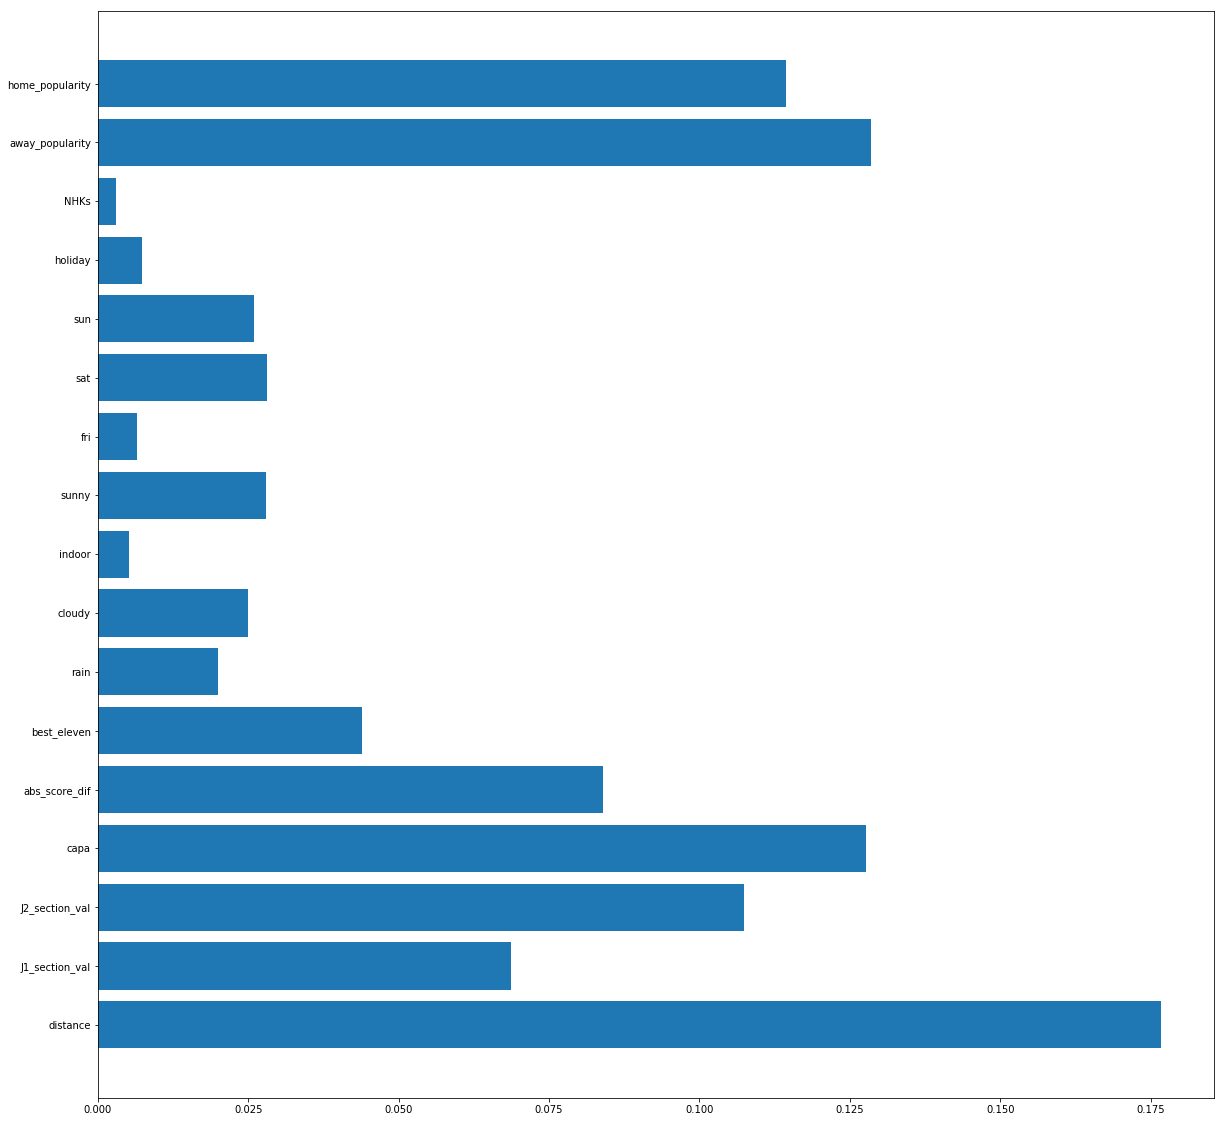

In [107]:
#X=df_pu.drop('y',axis=1).drop('section_val',axis=1).drop('pop_home',axis=1).drop('not_pop_home',axis=1).drop('pop_away',axis=1).drop('not_pop_away',axis=1)
#y=df_pu['y'].values

#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0,n_estimators=100)
rfc.fit(X_train,y_train)

importances =rfc.feature_importances_
importances

n_features=len(importances)
plt.figure(figsize=(20,20))
plt.barh(range(n_features),importances,align='center')
plt.yticks(np.arange(n_features),X_train.columns)
plt.show()

In [96]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9724248765272393
0.810312639541566


In [108]:
#線形回帰
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7812193217283792
0.7395048920369474


In [109]:
lr.coef_

array([-1.96743613e+02,  8.56145429e+02,  8.90734362e+02,  1.57954792e-01,
       -1.29192232e+02,  1.29671111e+02, -5.54829992e+02,  5.03246879e+02,
       -6.28692001e+02,  6.80275114e+02,  7.06399652e+02,  1.31778651e+03,
        1.33222501e+03,  2.11824261e+03,  7.71299635e+03,  1.94871932e+02,
        2.25739698e+02])

In [110]:
X.columns

Index(['distance', 'J1_section_val', 'J2_section_val', 'capa', 'abs_score_dif',
       'best_eleven', 'rain', 'cloudy', 'indoor', 'sunny', 'fri', 'sat', 'sun',
       'holiday', 'NHKs', 'away_popularity', 'home_popularity'],
      dtype='object')

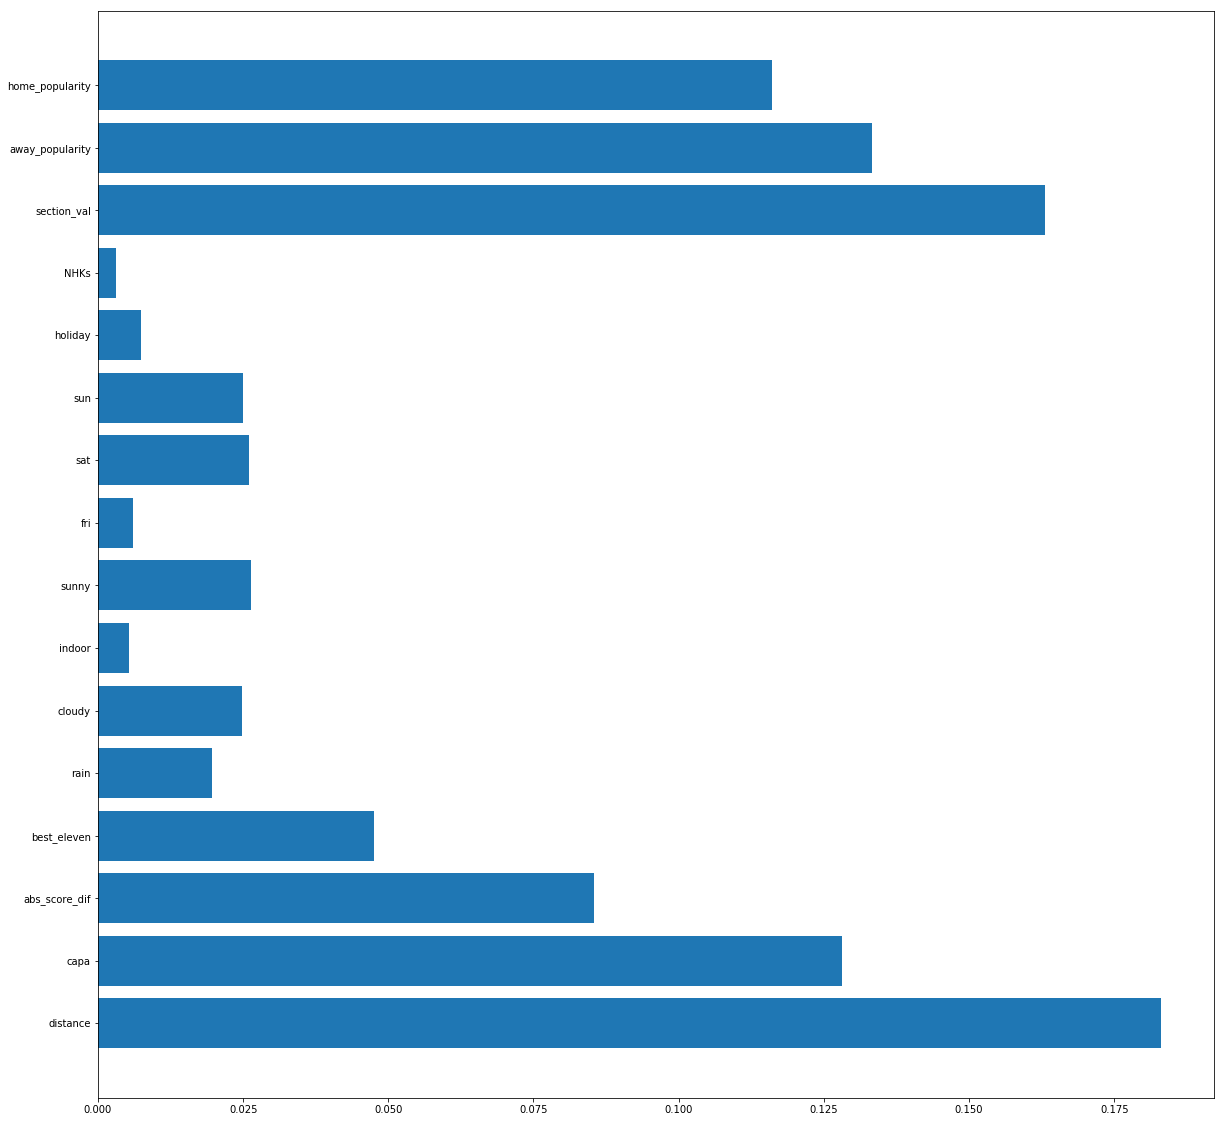

In [98]:
#section_val を入れてみる
X=df_pu.drop('y',axis=1).drop('J1_section_val',axis=1).drop('J2_section_val',axis=1).drop('pop_home',axis=1).drop('not_pop_home',axis=1).drop('pop_away',axis=1).drop('not_pop_away',axis=1)
y=df_pu['y'].values

#random forest classifier
#データ分割
from sklearn.model_selection import train_test_split
(X_train, X_test,y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0,)


from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0,n_estimators=100)
rfc.fit(X_train,y_train)

importances =rfc.feature_importances_
importances

n_features=len(importances)
plt.figure(figsize=(20,20))
plt.barh(range(n_features),importances,align='center')
plt.yticks(np.arange(n_features),X_train.columns)
plt.show()

In [99]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [100]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9665226141673865
0.7953640377238326


In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7811874946329567
0.7394792260901811


In [106]:
X.columns

Index(['distance', 'capa', 'abs_score_dif', 'best_eleven', 'rain', 'cloudy',
       'indoor', 'sunny', 'fri', 'sat', 'sun', 'holiday', 'NHKs',
       'section_val', 'away_popularity', 'home_popularity'],
      dtype='object')

In [105]:
lr.coef_

array([-1.96181072e+02,  1.58351383e-01, -1.29338879e+02,  1.17078860e+02,
       -5.54938856e+02,  5.03802271e+02, -6.24518913e+02,  6.75655498e+02,
        7.17449873e+02,  1.29936309e+03,  1.35556635e+03,  2.13303843e+03,
        7.72152989e+03,  8.83552909e+02,  1.90143428e+02,  2.24057128e+02])

In [47]:
#impurity について考えて特徴量の重要度を考察
#用いるモデルはRandomForestでいいのだろうか？

X_values = X.values
Y =y
 
rf = RandomForestRegressor()
scores = defaultdict(list)
names=df_pu.drop('y',axis=1).columns
    
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X_values), 100, .3):
    X_train, X_test = X_values[train_idx], X_values[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print ("Features sorted by their score:")
print (sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))


Features sorted by their score:
[(0.3697, 'pop_home'), (0.2751, 'capa'), (0.1413, 'not_pop_home'), (0.0906, 'pop_away'), (0.055, 'J1_section_val'), (0.0428, 'not_pop_away'), (0.0239, 'J2_section_val'), (0.0148, 'distance'), (0.0056, 'NHKs'), (0.005, 'sat'), (0.0036, 'abs_score_dif'), (0.003, 'best_eleven'), (0.0028, 'rain'), (0.0024, 'sun'), (0.0005, 'sunny'), (0.0004, 'holiday'), (0.0002, 'cloudy'), (-0.0, 'fri'), (-0.0003, 'indoor')]


In [88]:
#away_popularityとかにしてから考えたっもの
#mean decrease accuracy について考えて特徴量の重要度を考察

X=df_pu.drop('J1_section_val',axis=1).drop('J2_section_val',axis=1).drop('pop_home',axis=1).drop('not_pop_home',axis=1).drop('pop_away',axis=1).drop('not_pop_away',axis=1).drop('y',axis=1)
X_values = df_pu.drop('J1_section_val',axis=1).drop('J2_section_val',axis=1).drop('pop_home',axis=1).drop('not_pop_home',axis=1).drop('pop_away',axis=1).drop('not_pop_away',axis=1).drop('y',axis=1).values
Y =y
 
rf = RandomForestRegressor()
scores = defaultdict(list)
names=df_pu.drop('J1_section_val',axis=1).drop('J2_section_val',axis=1).drop('pop_home',axis=1).drop('not_pop_home',axis=1).drop('pop_away',axis=1).drop('not_pop_away',axis=1).drop('y',axis=1).columns
    
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X_values), 100, .3):
    X_train, X_test = X_values[train_idx], X_values[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print ("Features sorted by their score:")
print (sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))


Features sorted by their score:
[(0.7109, 'home_popularity'), (0.272, 'capa'), (0.1807, 'away_popularity'), (0.0343, 'section_val'), (0.0142, 'distance'), (0.0057, 'sat'), (0.004, 'NHKs'), (0.0038, 'sun'), (0.0026, 'rain'), (0.0014, 'best_eleven'), (0.0012, 'abs_score_dif'), (0.0005, 'holiday'), (0.0001, 'sunny'), (0.0001, 'indoor'), (-0.0, 'fri'), (0.0, 'cloudy')]


In [58]:
#impurity について考えて特徴量の重要度を考察
#ss
 
rf = RandomForestRegressor()
scores = defaultdict(list)
names=df_pu.drop('y',axis=1).columns
    
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X_values), 100, .3):
    X_train, X_test = X_values[train_idx], X_values[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print ("Features sorted by their score:")
print (sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))


numpy.ndarray

In [28]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7987638380583875
0.7544395888028204


In [64]:
(X_train, X_test,y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0,)

#XGboost
import xgboost as xgb
mod = xgb.XGBRegressor(gamma=1000)
mod.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1000, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [65]:
print(mod.score(X_train,y_train))
print(mod.score(X_test,y_test))

0.9089864427956529
0.8223933139552119


In [69]:
mod1=xgb.XGBRegressor(gamma=100000,max_depth=2)
mod1.fit(X_train,y_train)
print(mod1.score(X_train,y_train))

SyntaxError: invalid syntax (<ipython-input-69-ad7a933132e8>, line 1)

In [253]:
#Ridge回帰
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=10)   
model_ridge=Ridge(alpha=10)
model_ridge.fit(X_train.drop(['sunny','abs_score_dif'],axis=1),y_train)

print(model_ridge.score(X_train.drop(['sunny','abs_score_dif'],axis=1),y_train))
print(model_ridge.score(X_test.drop(['sunny','abs_score_dif'],axis=1),y_test))

0.7790830268256308
0.7367892642405187


In [255]:
print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train,model_ridge.predict(X_train.drop(['sunny','abs_score_dif'],axis=1)))),sqrt(mean_squared_error(y_test,model_ridge.predict(X_test.drop(['sunny','abs_score_dif'],axis=1))))))

RMSE Train: 3855.433, Test: 4022.942


In [256]:
#LASSOモデル
#X_train,y_trainなどを用意する
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=200)
model_lasso.fit(X_train.drop(['sunny','abs_score_dif'],axis=1),y_train)
#print(model_lasso.score(X_train,y_train))
#print(model_lasso.score(X_test,y_test))

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [257]:
print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train,model_lasso.predict(X_train.drop(['sunny','abs_score_dif'],axis=1)))),sqrt(mean_squared_error(y_test,model_lasso.predict(X_test.drop(['sunny','abs_score_dif'],axis=1))))))

RMSE Train: 3979.873, Test: 4128.934


In [258]:
#Elastic Ner
from sklearn.linear_model import ElasticNet

model_en=ElasticNet(alpha=1000,l1_ratio=0.9)
model_en.fit(X_train.drop(['sunny','abs_score_dif'],axis=1),y_train)


ElasticNet(alpha=1000, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [259]:
print('RMSE Train: %.3f, Test: %.3f' %(sqrt(mean_squared_error(y_train,model_en.predict(X_train.drop(['sunny','abs_score_dif'],axis=1)))),sqrt(mean_squared_error(y_test,model_en.predict(X_test.drop(['sunny','abs_score_dif'],axis=1))))))

RMSE Train: 4364.399, Test: 4533.300


In [50]:
#標準化
from sklearn.preprocessing import StandardScaler
import numpy as np
ss=StandardScaler()
X_std=ss.fit_transform(X_train)
y_trainr=np.array(y_train).reshape(-1,1)
y_std=ss.fit_transform(y_trainr)
X_stdt=ss.fit_transform(X_test)
y_testt=np.array(y_test).reshape(-1,1)
y_stdt=ss.fit_transform(y_testt)

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [75]:
y_std_=np.array(ss.fit_transform(np.array(y).reshape(-1,1)).reshape(1,-1)[0])

C:\Users\Chiaki Furusawa\Anaconda3\envs\py366\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [51]:
X_std

array([[-0.59664419, -0.79951983,  0.85219285, ...,  1.15101257,
        -0.19685985, -0.10172205],
       [ 0.66608661,  0.79499538, -1.20194229, ..., -0.86880024,
        -0.19685985, -0.10172205],
       [ 1.36174283, -0.79951983,  0.57858294, ...,  1.15101257,
        -0.19685985, -0.10172205],
       ...,
       [-1.06880757, -0.79951983,  0.64991808, ..., -0.86880024,
        -0.19685985, -0.10172205],
       [-0.3552065 , -0.79951983,  0.49805348, ..., -0.86880024,
        -0.19685985, -0.10172205],
       [-1.14984246,  1.8809752 , -1.20194229, ..., -0.86880024,
        -0.19685985, -0.10172205]])

In [25]:
# 標準化したデータで線形モデルを学習させる
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
#mean decrease accuracy について考えて特徴量の重要度を考察
#標準化したものなら、ダミー変数化したものがそんなに不利にならない？
 
rf = RandomForestRegressor()
scores = defaultdict(list)
names=df_pu.drop('y',axis=1).columns
    
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X_std), 100, .3):
    X_train, X_test = X_std[train_idx], X_std[test_idx]
    Y_train, Y_test = y_std_[train_idx], y_std_[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print ("Features sorted by their score:")
print (sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))


Features sorted by their score:
[(0.0452, 'not_pop_home'), (0.02, 'abs_score_dif'), (0.0115, 'sun'), (0.008, 'indoor'), (0.0047, 'holiday'), (-0.001, 'NHKs'), (-0.0022, 'cloudy'), (-0.007, 'fri'), (-0.0202, 'best_eleven'), (-0.0214, 'sunny'), (-0.027, 'sat'), (-0.0339, 'rain'), (-0.051, 'J1_section_val'), (-0.0743, 'pop_home'), (-0.079, 'pop_away'), (-0.1207, 'distance'), (-0.1409, 'not_pop_away'), (-0.1739, 'capa'), (-0.2636, 'J2_section_val')]


In [38]:
# 標準偏回帰係数を出力
lr_std.coef_

In [40]:
a=[-0.07156593,  0.29833372,  0.35429051,  0.20299204, -0.01919531,0.43953826, -0.16297467,  0.30197405, -0.01722524,  0.0066635 ,-0.04483145,  0.01455389, -0.00067943,  0.0209957 ,  0.0169149 ,0.08280938,  0.08081932,  0.05236853,  0.09272036]

In [27]:
df_pu.columns

Index(['y', 'distance', 'J1_section_val', 'J2_section_val', 'capa',
       'abs_score_dif', 'pop_home', 'not_pop_home', 'pop_away', 'not_pop_away',
       'best_eleven', 'rain', 'cloudy', 'indoor', 'sunny', 'fri', 'sat', 'sun',
       'holiday', 'NHKs'],
      dtype='object')

In [42]:
len(X_std)

1367

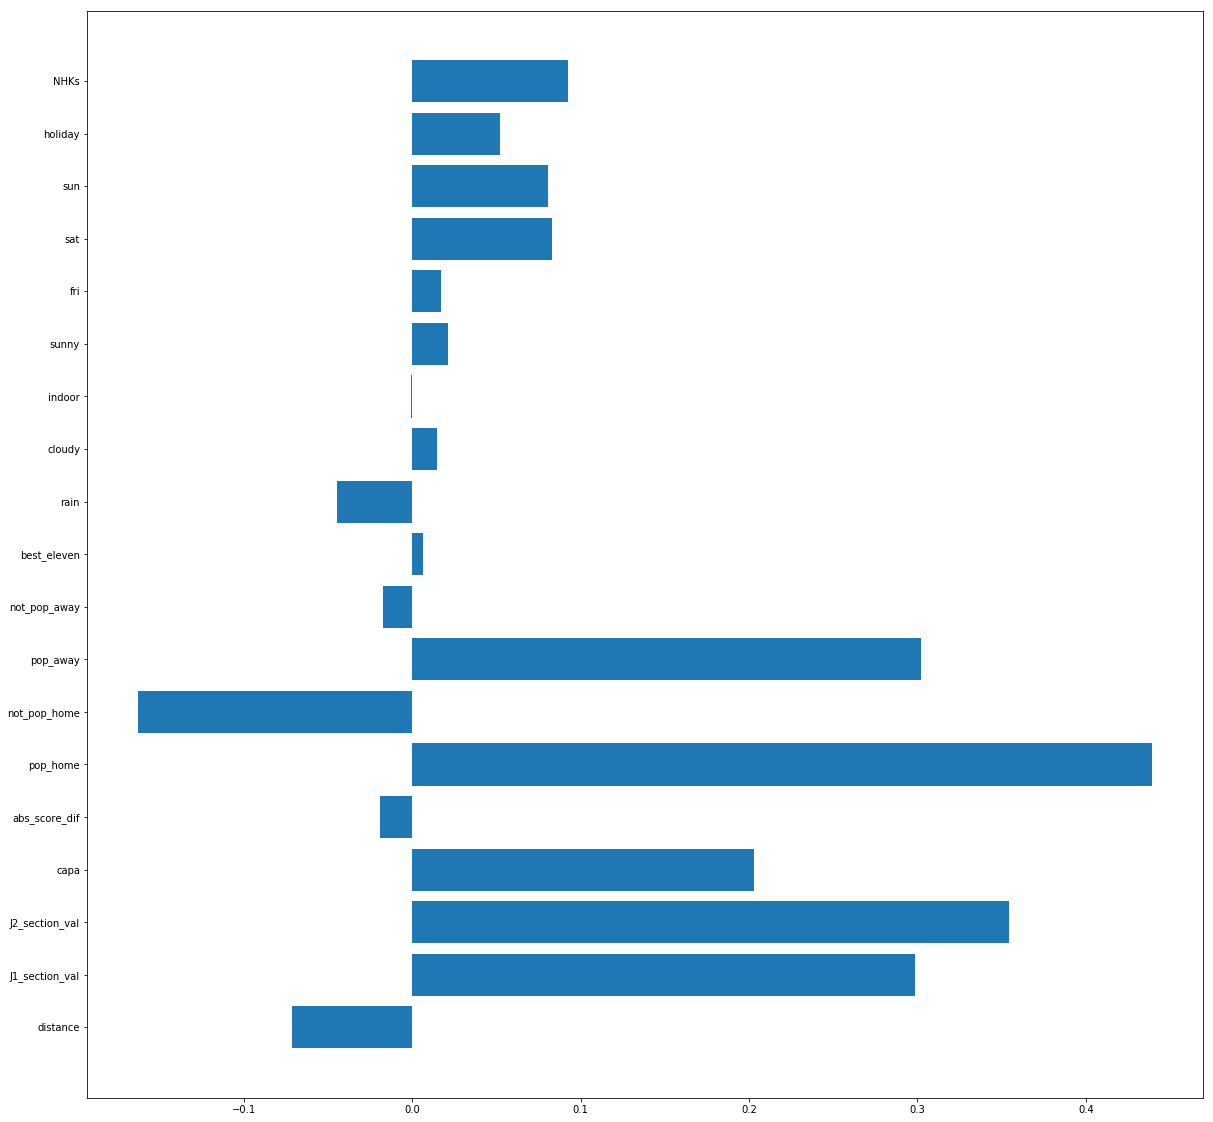

In [44]:
length=len(a)
plt.figure(figsize=(20,20))
plt.barh(range(length),a,align='center')
plt.yticks(np.arange(length),df_pu.columns[1:])
plt.show()